## Data Analyis Python project --Blinkit Analyis

> Add blockquote



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_excel("/content/BlinkIT Grocery Data.xlsx")

In [10]:
df.head(3)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0


In [11]:
df.tail(3)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [12]:
print ("size of the data :",df.shape)

size of the data : (8523, 12)


In [13]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [14]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


# Data cleaning


In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [16]:
df["Item Fat Content"]=df["Item Fat Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [17]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


# Business Requirement

## KPI's requirement


In [18]:
# Total sales
total_sales = df['Total Sales'].sum()

#Average sales
avg_sales = df["Total Sales"].mean()

#No of items sold
no_of_items_sold=df['Total Sales'].count()

# Average rating
avg_rating = df["Rating"].mean()

# Display

print(f"Total Sales:,${total_sales:,.2f}")
print(f"Average Sales:,${avg_sales:,.2f}")
print(f"No of Items Sold:,{no_of_items_sold:,}")
print(f"Average Rating:,{avg_rating:,.1f}")

Total Sales:,$1,201,681.49
Average Sales:,$140.99
No of Items Sold:,8,523
Average Rating:,4.0


### Chart Requirement

### Total sales by fat content

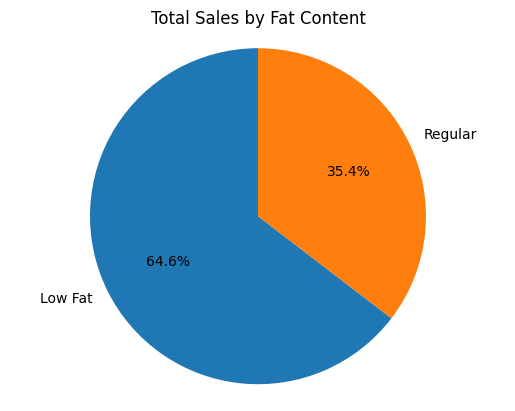

In [19]:
sales_by_fat = df.groupby("Item Fat Content")["Total Sales"].sum()
plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct="%1.1f%%", startangle=90)
plt.title("Total Sales by Fat Content")
plt.axis("equal")
plt.show()

# Total sales by item type

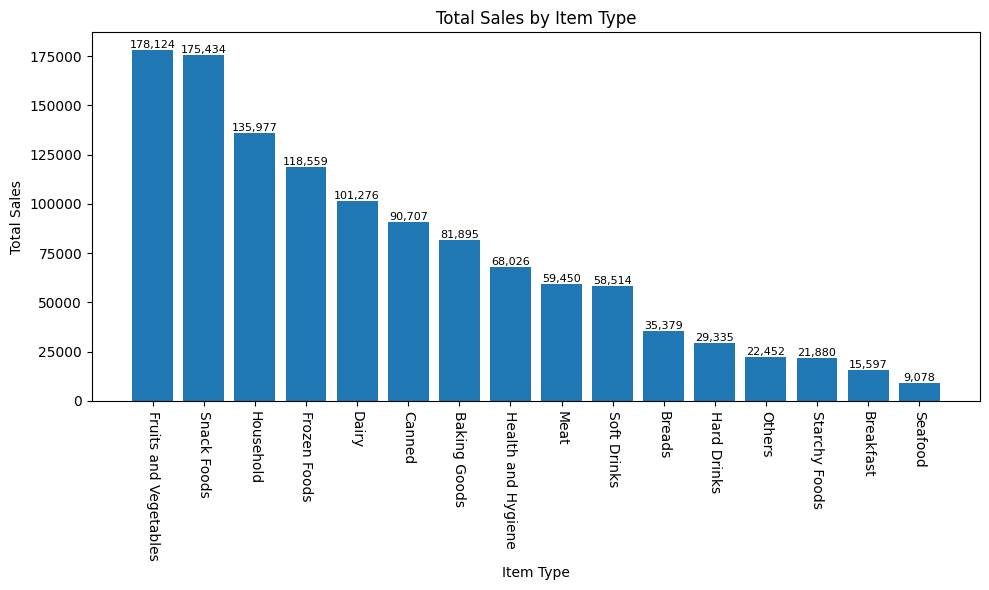

In [20]:
sales_by_type=df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)   # ha= horizontal axis , va = vertical axis

plt.tight_layout()
plt.show()

## Fat content by outlet for total sales

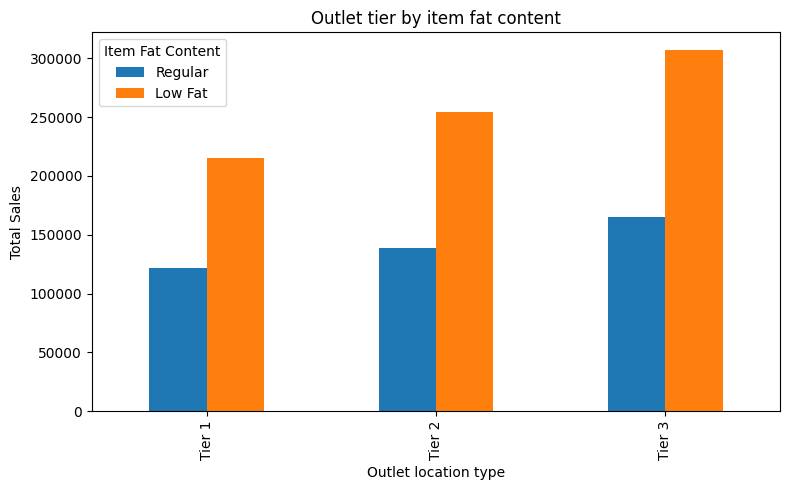

In [21]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Total Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar', figsize=(8,5),title='Outlet tier by item fat content')
plt.xlabel('Outlet location type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

# Total sales by outlet ***establishment***

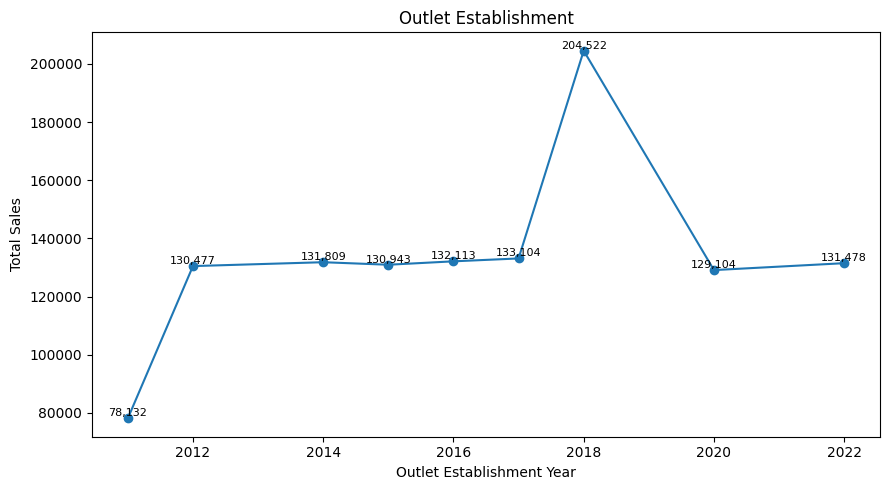

In [26]:
sales_by_year = df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()

plt.figure(figsize=(9,5))

plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x, y, f'{y:,.0f}',ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.show()

# Sales by outlet size

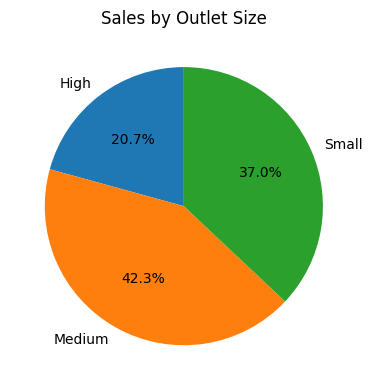

In [27]:
sales_by_size=df.groupby('Outlet Size')['Total Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()

# sales by outlet location

<function matplotlib.pyplot.show(close=None, block=None)>

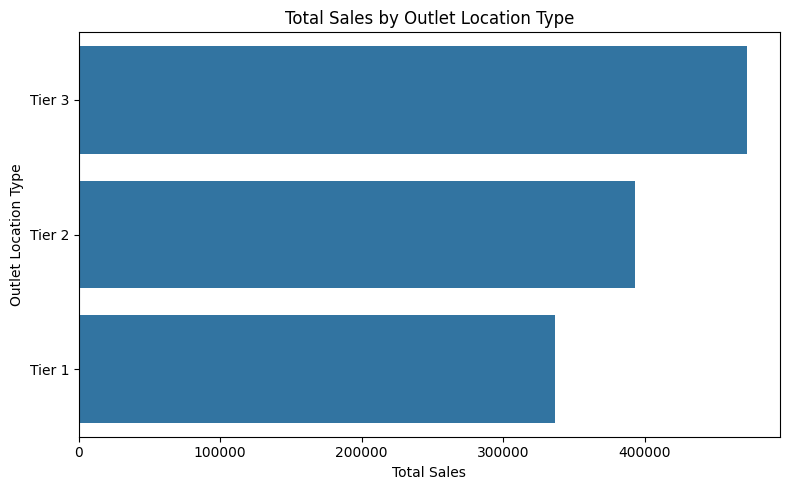

In [32]:
sales_by_location=df.groupby('Outlet Location Type') ['Total Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Total Sales', ascending=False)

plt.figure(figsize=(8, 5)) #Smaller height, enough width

ax=sns.barplot(x='Total Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout() # Ensures Layout fits without scroll

plt.show